In [1]:
from keras.layers import Input, Dense
from keras.models import Model

encoding_dim = 32  

# this is our input placeholder
input_img = Input(shape=(784,))
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)

encoder = Model(input_img, encoded)

encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))

autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')


Using TensorFlow backend.


In [7]:
from keras.datasets import fashion_mnist
import numpy as np
(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print x_train.shape
print x_test.shape
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)


4431872/4422102 [==============================] - 8s 2us/step
(60000, 784)
(10000, 784)
Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 2s 30us/step - loss: 0.4857 - val_loss: 0.3843
Epoch 2/50
60000/60000 [==============================] - 2s 30us/step - loss: 0.3608 - val_loss: 0.3480
Epoch 3/50
60000/60000 [==============================] - 2s 31us/step - loss: 0.3387 - val_loss: 0.3350
Epoch 4/50
60000/60000 [==============================] - 2s 30us/step - loss: 0.3288 - val_loss: 0.3274
Epoch 5/50
60000/60000 [==============================] - 2s 30us/step - loss: 0.3223 - val_loss: 0.3218
Epoch 6/50
60000/60000 [==============================] - 2s 30us/step - loss: 0.3174 - val_loss: 0.3176
Epoch 7/50
60000/60000 [==============================] - 2s 30us/step - loss: 0.3137 - val_loss: 0.3145
Epoch 8/50
60000/60000 [==============================] - 2s 30us/step - loss: 0.3109 - val_loss: 0.3120
Epoch 9/50
60000/6000

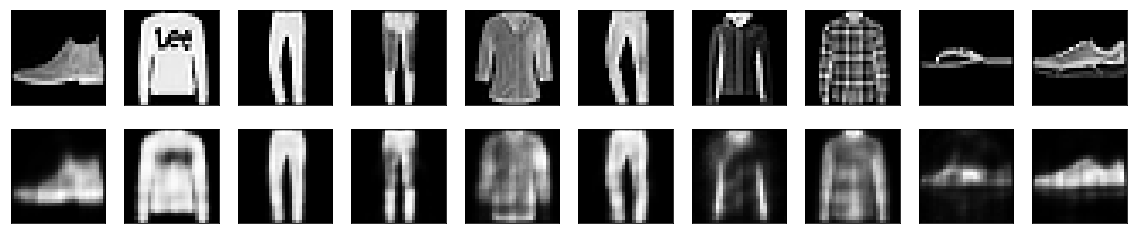

In [8]:
import matplotlib.pyplot as plt

n = 10  
plt.figure(figsize=(20, 4))
for i in range(n):
   
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()